In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [47]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

tf.version.VERSION



'2.1.0'

In [0]:
cifar = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

In [0]:
class_names = ['airplane','automobile','bird', 'cat',	'deer', 'dog', 'frog',	'horse',	'ship', 'truck']

In [50]:
train_images.shape

(50000, 32, 32, 3)

In [51]:
test_images.shape

(10000, 32, 32, 3)

In [74]:
train_labels
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

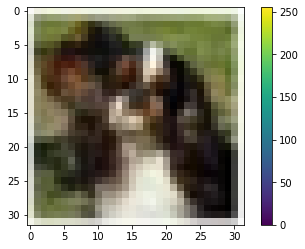

In [53]:
plt.figure()
plt.imshow(train_images[500])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

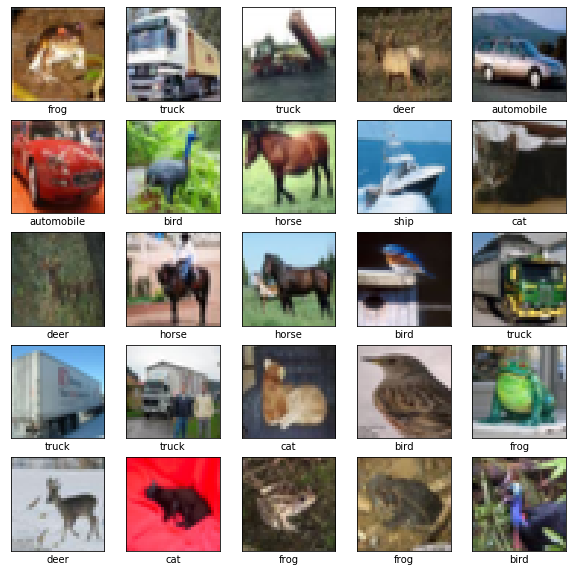

In [76]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)])

In [0]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
model.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 89us/sample - loss: 1.8970 - accuracy: 0.3190
Epoch 2/10
50000/50000 [==============================] - 4s 84us/sample - loss: 1.7691 - accuracy: 0.3708
Epoch 3/10
50000/50000 [==============================] - 4s 85us/sample - loss: 1.7254 - accuracy: 0.3885
Epoch 4/10
50000/50000 [==============================] - 4s 88us/sample - loss: 1.6951 - accuracy: 0.3968
Epoch 5/10
50000/50000 [==============================] - 4s 84us/sample - loss: 1.6852 - accuracy: 0.4001
Epoch 6/10
50000/50000 [==============================] - 4s 87us/sample - loss: 1.6720 - accuracy: 0.4070
Epoch 7/10
50000/50000 [==============================] - 4s 89us/sample - loss: 1.6617 - accuracy: 0.4095
Epoch 8/10
50000/50000 [==============================] - 4s 86us/sample - loss: 1.6513 - accuracy: 0.4096
Epoch 9/10
50000/50000 [==============================] - 4s 85us/sample - loss: 1.6442 - accuracy: 0.4152
Epoch 10/10
50

In [80]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Accuracy:', test_acc)

10000/10000 - 1s - loss: 1.6506 - accuracy: 0.4116
Accuracy: 0.4116


In [0]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [83]:
predictions[0]

array([0.06558522, 0.04217967, 0.16275367, 0.17600971, 0.22820002,
       0.10119861, 0.1097899 , 0.0339788 , 0.07615853, 0.00414579],
      dtype=float32)

In [84]:
np.argmax(predictions[0])

4

In [85]:
test_labels[0]

3

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

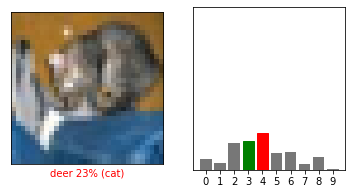

In [87]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

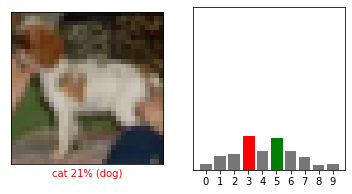

In [88]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

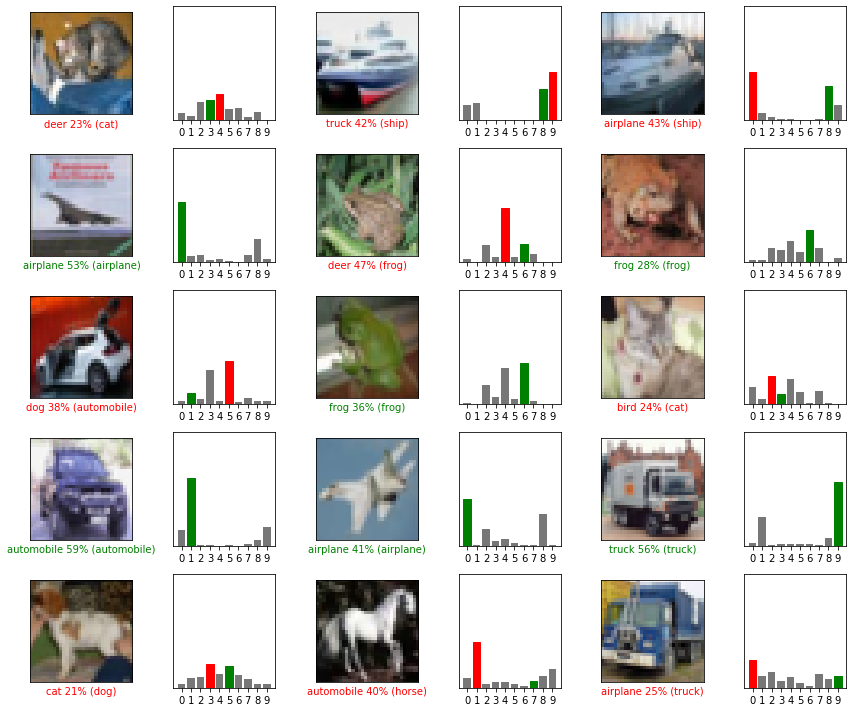

In [89]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [124]:
img = test_images[1]

print(img.shape)

(32, 32, 3)


In [125]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


In [126]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.13404517 0.15535049 0.00639247 0.00379435 0.00262175 0.00202342
  0.0004954  0.00182174 0.27209535 0.4213599 ]]


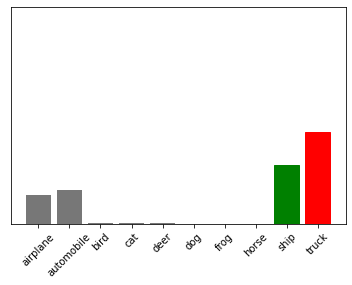

In [127]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [128]:
np.argmax(predictions_single[0])

9